In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../../autoencoder/")

In [2]:
adata = an.read_h5ad("../counts.h5ad.gzip")

In [29]:
gdi = pd.read_csv("../pbmcGDIordinato.csv", sep=";", decimal=",")

In [51]:
np.isin(gdi, adata.var_names).sum()

array([False, False, False, ..., False, False, False])

In [33]:
gdi = gdi.set_index("Gene")["GDI"]

In [34]:
np.isin(gdi.index, adata.var_names).sum()

9360

In [36]:
adata.var["GDI"] = gdi

<AxesSubplot: ylabel='Frequency'>

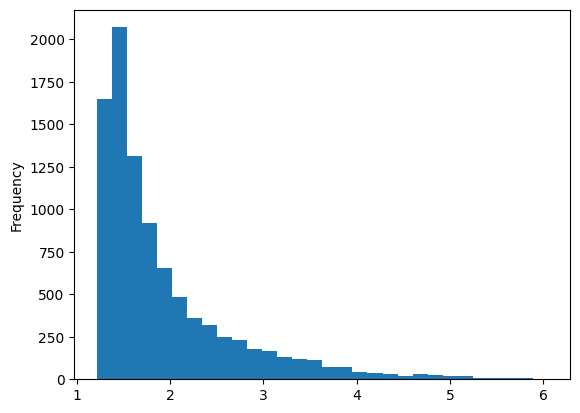

In [40]:
adata.var["GDI"].plot.hist(bins=30)

In [43]:
adata.var[["GDI", "highly_variable_rank"]].corr()

,GDI,highly_variable_rank
GDI,1.000000,-0.403819
highly_variable_rank,-0.403819,1.000000


In [44]:
adata.write_h5ad("../counts.h5ad.gzip", compression="gzip")``

In [47]:
adata.var["GDI"].notna().sum()

9360